In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def parse_energy_log(file_path):
    times = []
    energies = []

    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue  # Skip headers or empty lines
            parts = line.split()
            if len(parts) >= 3 and parts[2] == "Joules":
                times.append(float(parts[0]))  # Time in seconds
                energies.append(float(parts[1]))  # Energy in Joules

    return np.array(times), np.array(energies)

In [3]:

def aggregate_energy_per_minute(times, energies):
    # Convert times from seconds to minutes
    times_in_minutes = (times - times[0]) // 60  # Normalize and group into minutes

    # Create a DataFrame for grouping
    df = pd.DataFrame({"minute": times_in_minutes, "energy": energies})
    aggregated = df.groupby("minute")["energy"].sum().reset_index()
    
    return aggregated["minute"], aggregated["energy"]


In [16]:
def plot_energy(file_paths, labels):
    plt.figure(figsize=(10, 6))
    
    for file_path, label in zip(file_paths, labels):
        times, energies = parse_energy_log(file_path)
        minutes, total_energies = aggregate_energy_per_minute(times, energies)
        plt.plot(minutes, total_energies, marker='o', linestyle='-', label=label)
    
    plt.xlabel("Time (Minutes)")
    plt.ylabel("Average Energy Consumption (J)")
    plt.title("Energy Consumption Per Minute for Different Models")
    plt.legend()
    plt.grid(True)

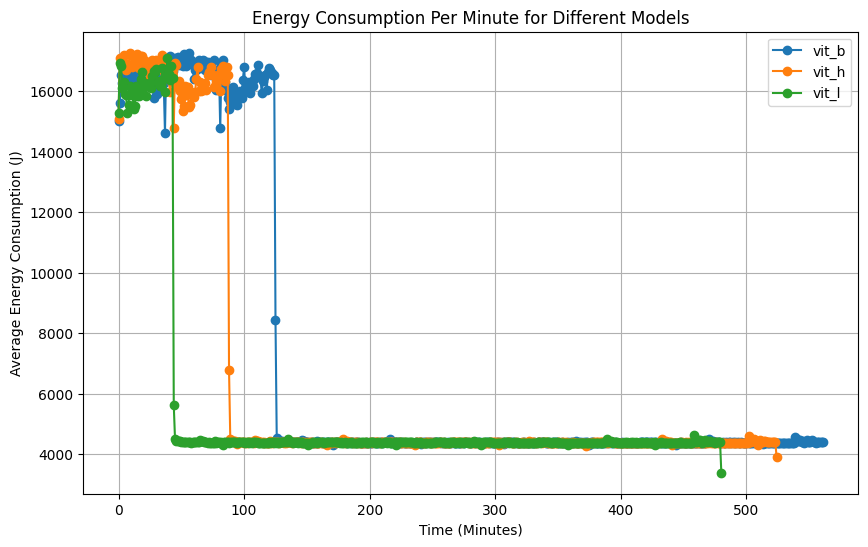

In [17]:
vit_b = "./sam_energy_log/sam_vit_b_01ec64_energy_log.txt"
vit_h = "./sam_energy_log/sam_vit_h_4b8939_energy_log.txt"
vit_l = "./sam_energy_log/sam_vit_l_0b3195_energy_log.txt"

files = ["./sam_energy_log/sam_vit_b_01ec64_energy_log.txt", 
         "./sam_energy_log/sam_vit_h_4b8939_energy_log.txt",
         "./sam_energy_log/sam_vit_l_0b3195_energy_log.txt"]

labels = ["vit_b", "vit_h", "vit_l"]

plot_energy(files, labels)